In [71]:
import os
import torch
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import torch.nn.functional as F
import skimage

In [3]:
! pwd

/Users/harshit/Desktop/NN/fastai


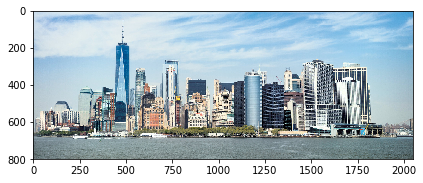

In [30]:
image = io.imread('/Users/harshit/Desktop/88ce0191bfc249b6aae1b472158cccc4-superJumbo.jpg')
io.imshow(image/255)

In [81]:
image = skimage.color.rgb2gray(image)
image.shape # numpy images are channel last

(799, 2048)

In [83]:
image = image[:,:,None]
image_t = torch.from_numpy(image.transpose((2, 0, 1))) # tensors are channel first

In [84]:
image_t.shape

torch.Size([1, 799, 2048])

In [85]:
image_t[None,:,:,:].shape

torch.Size([1, 1, 799, 2048])

In [86]:
image_t = image_t[None,:,:,:].float()

In [119]:
k = torch.tensor([
    [1/16,1/8,1/16],
    [1/8,1/4,1/8],
    [1/16,1/8,1/16],
]).expand(1,1,3,3)

In [126]:
image_t = image_t.float()

In [105]:
image_t.shape

torch.Size([1, 1, 799, 2048])

In [106]:
k.shape

torch.Size([1, 1, 3, 3])

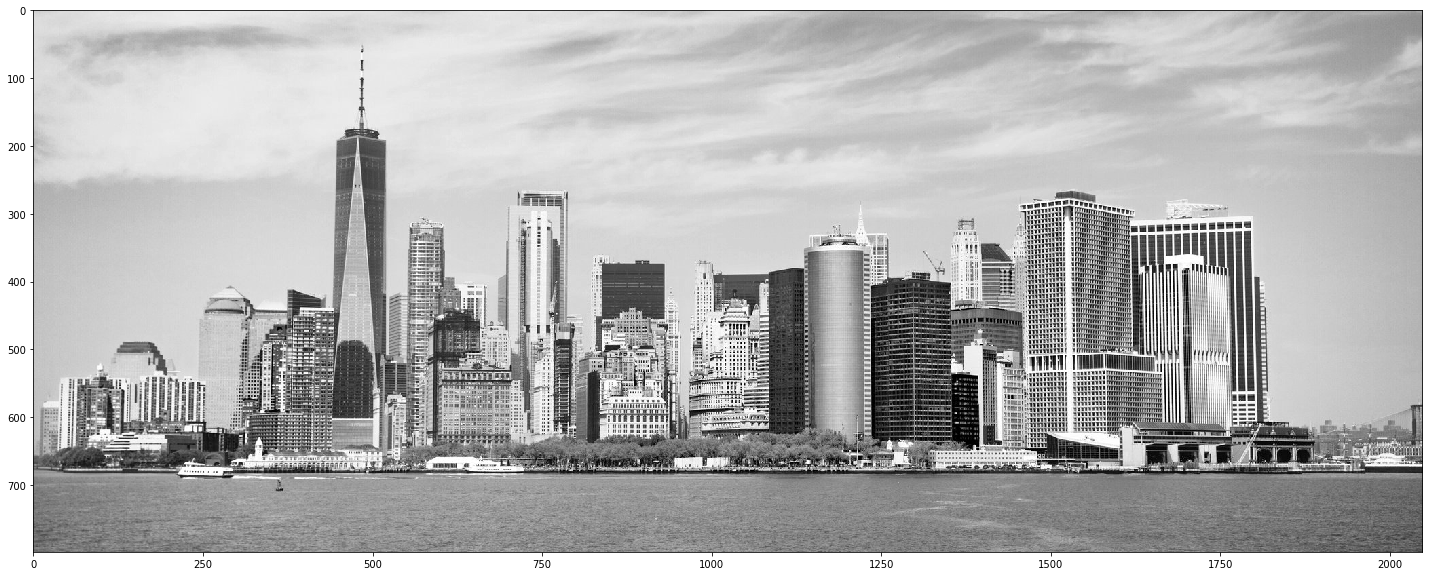

In [121]:
plt.figure(figsize = (20,20))
io.imshow(np.squeeze(image))

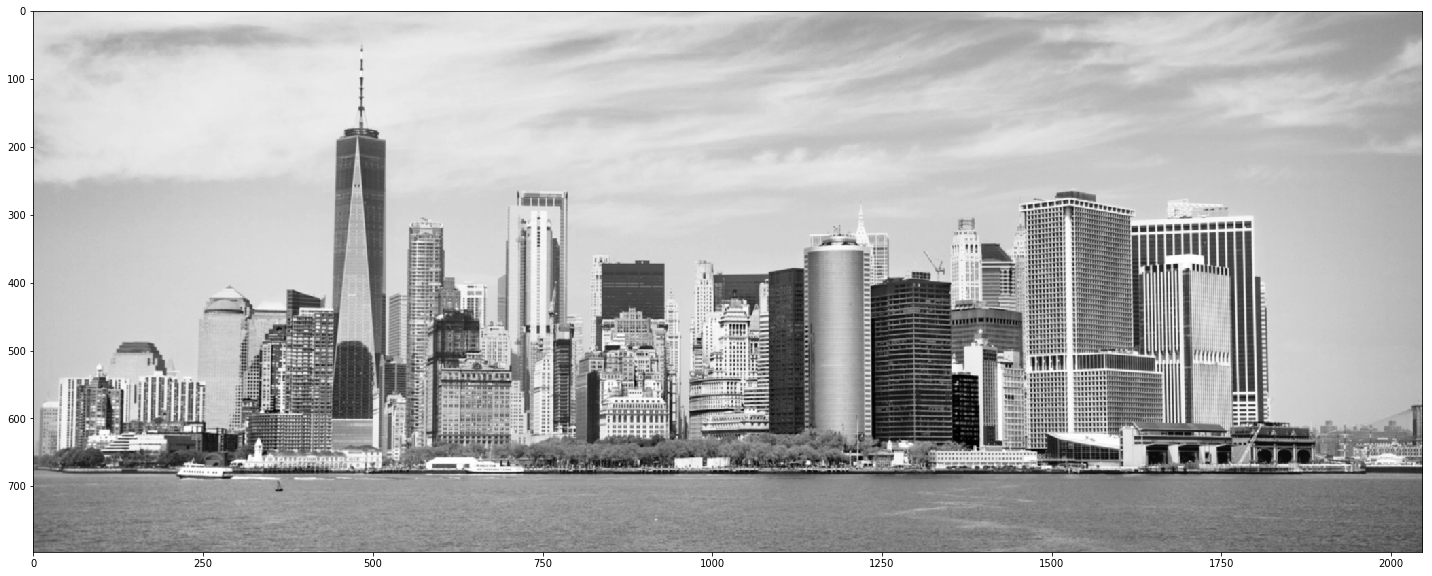

In [123]:
plt.figure(figsize = (20,20))
io.imshow(np.squeeze(F.conv2d(image_t, k).numpy()))

In [128]:
k = torch.tensor([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1],
]).expand(1,1,3,3).float() # outline

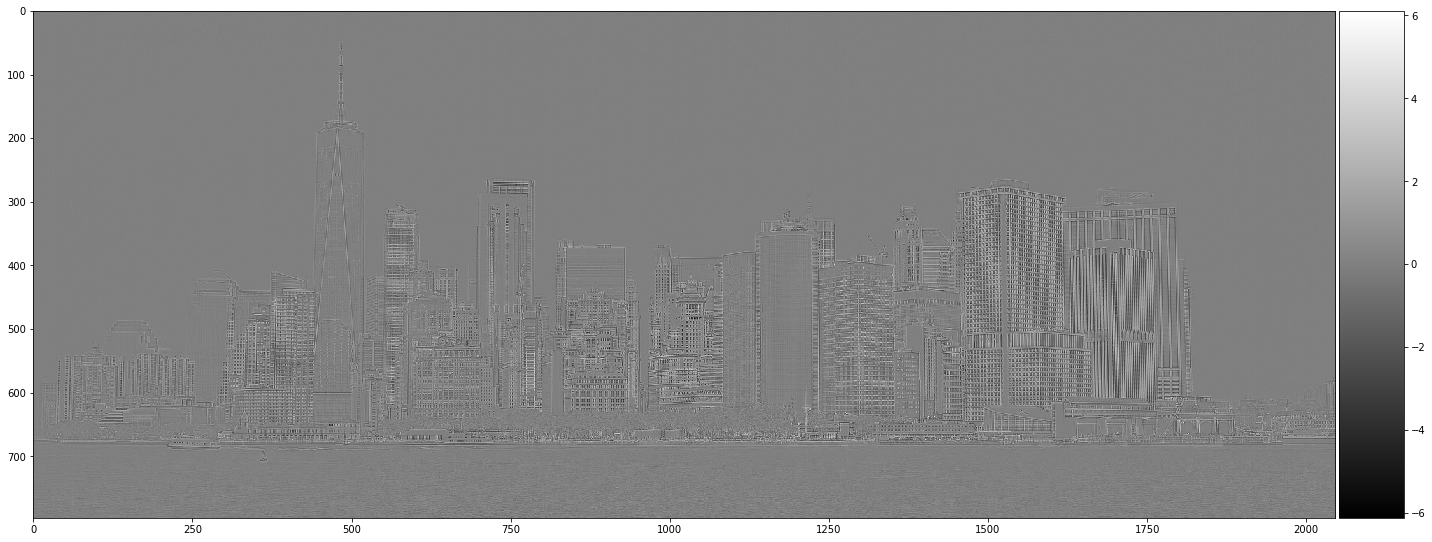

In [130]:
plt.figure(figsize = (20,20))
io.imshow(np.squeeze(F.conv2d(image_t, k).numpy()), cmap='gray')

In [131]:
k = torch.tensor([
    [-1.,0.,1.],
    [-2.,0.,2.],
    [-1.,0.,1.],
]).expand(1,1,3,3)

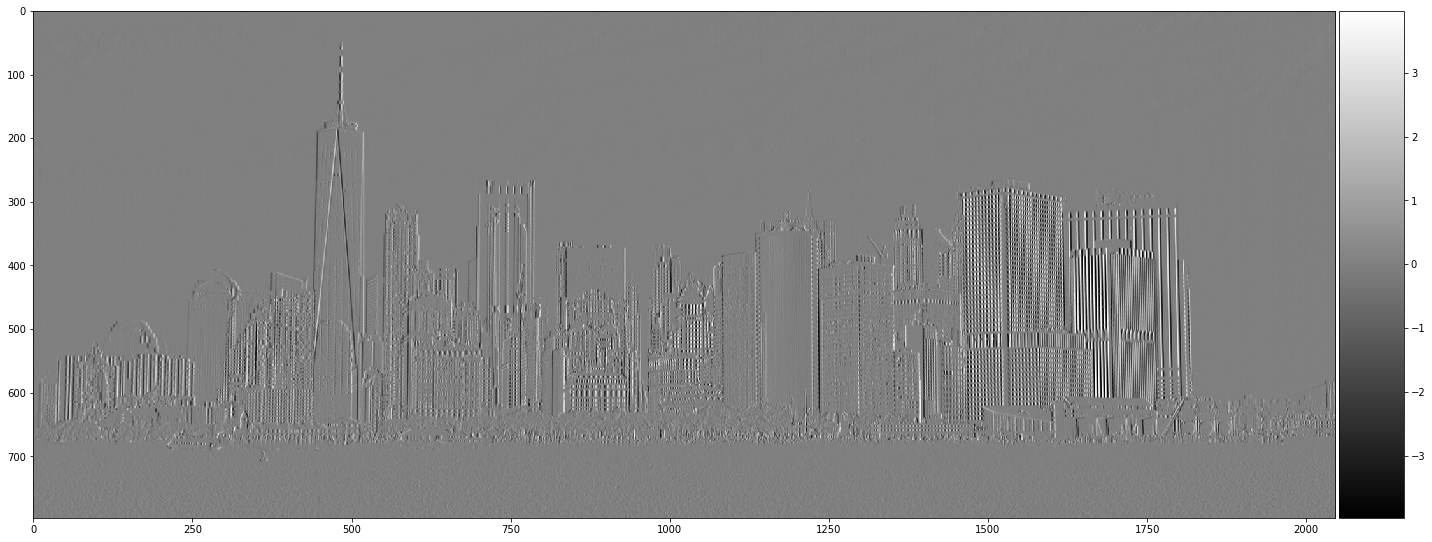

In [132]:
plt.figure(figsize = (20,20))
io.imshow(np.squeeze(F.conv2d(image_t, k).numpy()), cmap='gray')